[View in Colaboratory](https://colab.research.google.com/github/rdenadai/BolaoSimples/blob/master/notebooks/T2/T2_Sentiment_Analysis.ipynb)

# IA369 - Y Computação Afetiva

Exercício proposto pela Prof. Paula para o alunos de sua disciplina de Pós-Graduação 

## T2 - Análise de Sentimentos em Textos

### Objetivo

O objetivo desta tarefa é expor os alunos aos desafios práticos envolvidos na análise de textos e na atribuição de valores de valência ou rótulos de emoções a sentenças.

Não é objetivo desta tarefa avaliar a acurácia de detecção ou a eficiência do modelo implementado mas a análise crítica do projeto e o amadurecimento em relação ao problema.

### Descrição da Tarefa

Esta tarefa deverá ser realizada individualmente ou em dupla.

Deve-se escolher um entre os dois problemas propostos abaixo.


### Problema escolhido #2

 - Este problema utilizará a mesma base de dados utilizada no SemEval 2007 - 4th International Workshop on Semantic Evaluations, Task 14, Affective Tests.
 - A base de treinamento conta com 250 manchetes em inglês de jornais e websites (Google, CNN, etc.)
 - A cada manchete está associado um score de (0 a 100)  para os rótulos "anger", "disgust", "fear", "joy", "sadness", "surprise"
 - Também será fornecida uma base de testes e os rótulos "golden" fornecidos durante a conferência.
 - Todos os dados podem ser acessados pelo link, abaixo. Mas atenção, considerar apenas os dados referentes  a rótulos de emoções (identificados com sufixo *emotions*). A leitura dos arquivos README é essencial para o entendimento da base. http://web.eecs.umich.edu/~mihalcea/affectivetext/
 - A tarefa consiste em definir a abordagem ao problema, o modelo de classificação, as regras de análise e deverá realizar uma implementação prática do algoritmo definido.

### Dupla

- Edgar Lopes Banhesse RA 993396
- Rodolfo De Nadai RA 208911

## Abordagem para resolução do problema

Para resolver o problema a abordagem será composta pelas seguintes etapas:

1) Pré-processamento do texto - consiste na preparação das bases de treinamento e testes que serão utilizadas para treinar e testar os modelos de regressão.

2) Escolha e treinamento do classificador - iremos avaliar vários modelos de regressão para verificar qual deles possui melhor acurácia levando em consideração a pequena quantidade de dados para treinamento.

3) Avaliar os modelo - utilizar métricas, tais como: RMSE (Root-Mean Square Error), F2 score para avaliar a precisão dos resultados obtidos com os modelos.

4) Avaliar um modelo de Deep Learning - utilzaremos a biblioteca pytorch para gerar e avaliar um modelo de Redes Neurais, verificando se obteremos melhores resultados.

5) Melhorar os modelos - treinar os modelos utilizando diferentes parâmetros. (esta tarefa não será 100% demonstrada no documento devido a grande quantidade de parâmetros)

6) Aumentar a base de dados, acrescendo mais frases em inglês.

7) Opotunidades - analisar os resultados obtidos em busca de oportunidades.
- Vocês concordam com os rótulos que o algoritmo atribuiu?
- Foi possível descobrir algo relevante sobre os dados a partir da análise de sentimentos?
- Considerando que nenhum modelo é perfeito, quais são os pontos fracos do algoritmo implementado?
- Quais seriam os pontos fortes?

8) Considerações Finais - finalizar o experimento relatando as principais descobertas.

9) Lições aprendidas - registrar as principais lições aprendidas durante a realização da tarefa.

-------------------------------------------

## Iniciando a resolução do Problema

Para iniciar a resolução do problema iremos:

1. Realizar o download do dataset disponibilizado pelo SemEval2007;
2. Importar as bibliotecas e funções em python para desenvolvimento do projeto;
3. Após importado o dataset, realizar o parser dos dados e carregar em memória;

#### 1. Download do Dataset a ser utilizado e descompactação do mesmo.

In [1]:
!rm -rf AffectiveText.Semeval.2007.tar.gz
!wget http://web.eecs.umich.edu/~mihalcea/downloads/AffectiveText.Semeval.2007.tar.gz
!tar -zxvf AffectiveText.Semeval.2007.tar.gz
!ls
!ls AffectiveText.trial


Redirecting output to ‘wget-log’.
AffectiveText.test/
AffectiveText.test/affectivetext_test.xml
AffectiveText.test/README
AffectiveText.test/affectivetext_test.valence.gold
AffectiveText.test/affectivetext_test.emotions.gold
AffectiveText.trial/
AffectiveText.trial/affectivetext_trial.valence.gold
AffectiveText.trial/affectivetext_trial.emotions.gold
AffectiveText.trial/affectivetext_trial.xml
AffectiveText.trial/README
AffectiveText.Semeval.2007.tar.gz  AffectiveText.trial	wget-log
AffectiveText.test		   sample_data
affectivetext_trial.emotions.gold  affectivetext_trial.xml
affectivetext_trial.valence.gold   README


Instalação da biblioteca Pytorch para usar e avaliar um modelo de Rede Neural no processo.

In [2]:
!pip install torch torchvision

    100% |████████████████████████████████| 519.5MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5a138000 @  0x7f743213c1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 19.6MB/s 
    100% |████████████████████████████████| 2.0MB 1.6MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


#### 2. Importação de bibliotecas.

Importação das diversas bibliotecas que serão utilizadas durante o desenvolvimento desta tarefa.

In [3]:
import re
import pprint
import copy
from collections import namedtuple
from random import shuffle
import nltk
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

np.warnings.filterwarnings('ignore')

# Download de alguns dataset disponibilizados pelo NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('movie_reviews')
nltk.download('sentence_polarity')
nltk.download('sentiwordnet')
nltk.download('stopwords')
nltk.download('words')

from nltk.corpus import movie_reviews
# from nltk.corpus import sentence_polarity
# from nltk.corpus import sentiwordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# Import dos modelos a serem testados
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge, BayesianRidge
# Importanto as funções matemáticas para as métricas.
# Como os modelos são de regressão, precisamos utilizar métodos como o MSE e R2
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

Conjunto = namedtuple('Conjunto', ['uid', 'phrase',
                                   'tokens',
                                   'valence', 'anger',
                                   'disgust', 'fear',
                                   'joy', 'sadness', 'surprise'])

pp = pprint.PrettyPrinter(indent=4)

def normalization(a, b, x):
    return a + (((x - np.min(x)) * (b-a)) / (np.max(x) - np.min(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package sentence_polarity to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package sentence_polarity is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


#### 3. Importando o Dataset do SemEval 2007 para uma estrutura.

 - **Phrases**: id, phrase
 - **Emotions**: id, anger, disgust, fear, joy, sadness, surprise 
 - **Valence**: id, valence
 
Valor de retorno da função load_semeval_dataset:
 
 - **Content**: uid, phrase, valence,  anger, disgust, fear, joy, sadness, surprise

In [0]:
def clean_phrase(phrase):
    phrase = phrase.lower()
    # Remove pontuação
    phrase = re.sub(r'[\"\'!@#$%&*\(\)-_=+{}\[\]:;>.<,|\\`´]', '', phrase)
    # Remover stopwords em inglês e Lematização das palavras
    wordnet_lemmatizer = WordNetLemmatizer()
    # stwords = set(stopwords.words('english'))
    stwords = set(ENGLISH_STOP_WORDS)
    phrase = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in phrase.split() if word not in stwords and len(word) > 2])
    # Remove espaços em branco extras
    phrase = re.sub(r'\s{1,}', ' ', phrase)
    return phrase


def tokenize(phrase):
    # Limpar e retorna trigramas da frase
    return clean_phrase(phrase).split()


def load_semeval_dataset(fname='test'):
    content = []
    phrases = []
    emotions = []
    valences = []
    with open(f'AffectiveText.{fname}/affectivetext_{fname}.xml') as fxml:
        parser = BeautifulSoup(fxml.read())
        phrases = list(filter(None, parser.text.split('\n')))
    with open(f'AffectiveText.{fname}/affectivetext_{fname}.emotions.gold') as femotions:
        emons = list(filter(None, femotions.read().split('\n')))
        for emotion in emons:
            emon = [int(e) for e in emotion.split()]
            emotions.append(emon)
    with open(f'AffectiveText.{fname}/affectivetext_{fname}.valence.gold') as fvalences:
        valens = list(filter(None, fvalences.read().split('\n')))
        for valence in valens:
            valen = [int(v) for v in valence.split()]
            valences.append(valen)
    for i, phrase in enumerate(phrases):
        content.append(Conjunto(uid=valences[i][0],
                                phrase=phrase,
                                tokens=tokenize(phrase),
                                valence=valences[i][1:][0],
                                anger=emotions[i][1],
                                disgust=emotions[i][2],
                                fear=emotions[i][3],
                                joy=emotions[i][4],
                                sadness=emotions[i][5], 
                                surprise=emotions[i][6]))
    return content


def retorna_frases(conjunto):
    """Retorna o conjunto de dados a serem utilizados no modelos."""
    frases = [conj.phrase for conj in conjunto]
    valencia = [conj.valence for conj in conjunto]
    sentimentos = [[conj.anger, conj.disgust, conj.fear, conj.joy, conj.sadness, conj.surprise] for conj in conjunto]
    return frases, valencia, sentimentos


# Carregar os dados de test e trial
train = load_semeval_dataset('test')
test = load_semeval_dataset('trial')

## Classificação das Frases

Com o objetivo de encontrar a valência das frases é necessário a conversão de todo o texto em vetores escalares.

Uma maneira de realizar essa operação é utilizando TF-IDF o qual é uma maneira estatística de indicar a importância de uma palavra dentro da coleção de documentos.

Desa maneira, abaixo segue a implementação do método TF-IDF e um comparativo com as ferramentas fornecidas pela biblioteca Scikit-Learn.


### TF-IDF

Implementação do método estatístico TF-IDF e comparativo com a versão implementada pela biblioteca scikit-learn.

Na biblioteca da scikit-learn é aplicada dentre outros procedimentos a normalização nos termos resultantes da tf-idf. A normalização utilizada é a distância euclidiana dos valores. É possível verificar uma explicação detalhada de alguns passos da implementação no [site](http://scikit-learn.org/stable/modules/feature_extraction.html) deles.

Nossa implementação abaixo, segue o padrão apresentado na [wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

Onde:

$tfidf(t, d, D) = tf(t,d) \times idf(t, D)$

$tf(t, d) = f_{t,d} / \Sigma{f_{t',d}}$

$idf(d, D) = \log \frac{|D|}{d}$

Sendo $t$ o termo (palavra), $d$ o documento e $D$ o conjunto de documentos.

In [0]:
class TfidfImpl:

    def __init__(self, stopwords=None):
        self.stopwords = stopwords
    
    def clean_phrase(self, phrase):
        phrase = phrase.lower()
        # Remove pontuação
        phrase = re.sub(r'[\"\'!@#$%&*\(\)-_=+{}\[\]:;>.<,|\\`´]', '', phrase)
        if self.stopwords == 'english':
            # Remover stopwords em inglês e Lematização das palavras
            wordnet_lemmatizer = WordNetLemmatizer()
            # stwords = set(stopwords.words('english'))
            stwords = set(ENGLISH_STOP_WORDS)
            phrase = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in phrase.split() if word not in stwords and len(word) > 2])
        # Remove espaços em branco extras
        phrase = re.sub(r'\s{1,}', ' ', phrase)
        return phrase


    def tokenize(self, phrase):
        # Limpar e retorna trigramas da frase
        return self.clean_phrase(phrase).split()
    
    def bag_of_words(self, phrases):
        bow = []
        for phrase in phrases:
            bow += phrase
        return sorted(set(bow))


    def compute_tf(self, words):
        tf = {}
        lbow = len(words)
        for word in words:
            tf[word] = tf.get(word, 0) + 1
        for word, count in tf.items():
            tf[word] = count / lbow
        return tf


    def compute_idf(self, phrases, N, bow):
        idfs = {}
        for df in bow:
            idfs[df] = idfs.get(df, 0)
            for words in phrases:
                if df in words:
                    idfs[df] = idfs.get(df, 0) + 1
        for df in idfs.keys():
            idfs[df] = np.log10(N / idfs[df])
        return idfs


    def compute(self, phrases):
        # Checagem... e conversão
        assert len(phrases) > 0
        if type(phrases[0]) is str:
            phrases = [self.tokenize(phrase) for phrase in phrases]
        
        tf_idf = {}
        N = len(phrases)
        bow = self.bag_of_words(phrases)
        idf = self.compute_idf(phrases, N, bow)
        for words in phrases:
            tf = self.compute_tf(words)
            for word, val in tf.items():
                tf_idf[word] = val * idf[word]
        return tf_idf

Resultados das funções criadas acima:

In [9]:
# Testes  
phrases = ['The cat is in the hole', 'The rat is in the hole', 'The dog are looking at you througth the hole']

# Mostrando apenas as primeiras palavras com menor valor
head = 5

print('Nossa implementação: ')
Tfidf = TfidfImpl(stopwords='english')
tf_idf = Tfidf.compute(phrases)
df = pd.DataFrame({'term': list(tf_idf.keys()), 'weight': list(tf_idf.values())})
df = df.sort_values(by='weight', ascending=True)
display(df.head(head))

print()
print('-' * 20)
print('Implementação do Scikit-Learn: TfidfVectorizer')
vectorizer = TfidfVectorizer(stop_words='english', norm=None, smooth_idf=False)
transformed_weights = vectorizer.fit_transform(phrases)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})
weights_df = weights_df.sort_values(by='weight', ascending=True)
display(weights_df.head(head))

print()
print('-' * 20)
print('Implementação do Scikit-Learn: CountVectorizer + TfidfTransformer')
cvec = CountVectorizer(stop_words='english')
cvec.fit(phrases)
cvec_counts = cvec.transform(phrases)
transformer = TfidfTransformer(norm=None, smooth_idf=False)
transformed_weights = transformer.fit_transform(cvec_counts)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df = weights_df.sort_values(by='weight', ascending=True)
display(weights_df.head(head))

Nossa implementação: 


,term,weight
1,hole,0.000000
3,dog,0.119280
4,looking,0.119280
5,througth,0.119280
0,cat,0.238561



--------------------
Implementação do Scikit-Learn: TfidfVectorizer


,term,weight
0,cat,0.699537
1,dog,0.699537
3,looking,0.699537
4,rat,0.699537
5,througth,0.699537



--------------------
Implementação do Scikit-Learn: CountVectorizer + TfidfTransformer


,term,weight
0,cat,0.699537
1,dog,0.699537
3,looking,0.699537
4,rat,0.699537
5,througth,0.699537


### Modelos de ML

Vamos verificar modelos de ML para validar qual o melhor modelo se encaixa no problema que estamos tentando avaliar.

O problema é de Regressão e não de Classificação (não queremos saber as classes dos itens, mas o quanto ele se aproxima de seus conjuntos pares), portanto os modelos selecionados serão de Regressão.

Faremos abaixo o teste da implementação de um algoritmo de Machine Learning mais simples, denominado Regressão Linear de uma Variável e Regressão Linear Multiplas Variáveis.

#### Simple Linear Regression

Para calcular a Regeressão Linear mais simples (de uma variável), utilizamos o seguinte cálculo:

$Y = \alpha + \beta x$

No caso precisamos encontrar os valores de $\alpha$ e $\beta$, para isso utilizaremos a equação:

$\alpha = \hat{y} - \beta \hat{x}$

$\beta = Cov(x, y) / Var(x)$

$Cov(x, y) = \Sigma_{i=0}^N \frac{(x - \hat{x}) (y - \hat{y})}{N}$

Onde $\hat{x}$ e $\hat{y}$ são respectivamente as médias de x e y, Cov é a covariancia entre x e y, e Var é a variância.

Referências: 
 - [Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression)
 - [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)

Equal implementation (scipy):  True
Equal implementation (scikit-learn):  True


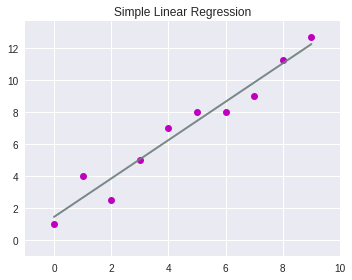

In [11]:
# Regressão Linear de uma variável

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 4, 2.5, 5, 7, 8, 8, 9, 11.25, 12.67])


def linear_regression(x, y):
    # covariance
    N = len(x)
    c_xy = np.sum(((x - np.mean(x)) * (y - np.mean(y))) / N)
    b = c_xy / np.var(x)
    a = np.mean(y) - (b * np.mean(x))
    return a + (b * x)

e = linear_regression(x, y)
# scipy implementation
e_sc = sc.stats.linregress(x, y)
e_sc_value = e_sc.slope * x + e_sc.intercept
# Scikit-Learn implementation
k = [[m] for m in x]
reg = LinearRegression().fit(k, y)
e_sk_value = reg.coef_ * k + reg.intercept_

# show off
error = 1e-10
print('Equal implementation (scipy): ', np.sum(e - e_sc_value) < error)
print('Equal implementation (scikit-learn): ', np.sum(e - e_sk_value) < error)

plt.figure(figsize=(5, 4))
plt.title('Simple Linear Regression')
plt.plot(x, y, 'mo')
plt.plot(e, alpha=.75)
plt.plot(e_sc_value, alpha=.5)
plt.plot(e_sk_value, alpha=.25)
plt.xlim([-1, np.max(x) + 1])
plt.ylim([-1, np.max(y) + 1])
plt.tight_layout()
plt.show()

#### Multivariable Linear Regression

Para calcular a Regressão Linear de Múltiplas Variáveis, por utilizarmos o método dos [**Mínimos Quadrados**](https://en.wikipedia.org/wiki/Ordinary_least_squares), podemos utilizar a notação matricial de acordo com as fórmulas abaixo:

$Y = x\beta$

$\beta = (x^Tx)^{-1}x^Ty$

A implementação *linear_regression_mul_impl* funciona bem para vetores com poucas dimensões, ou que tenha uma lineariedade explicita.

Entretanto para os valores corretos (comparados iguais ao retornado pela scikit-learn) o valor de $b$ deve ser calculados com certa correção e melhor precisão, algo realizado pela biblioteca numpy ao utilizar a função *np.linalg.lstsq*.

In [13]:
x = np.array([
    [0, 5, 7, 9, 10],
    [2.27, 3.27, 8.27, 10, 12],
    [0.5, 6.5, 7.5, 9, 11],
    [4.5, 9.5, 15.5, 17, 17.5],
]) 
y = np.array([2.5, 9, 11.25, 13.45])


def linear_regression_mul_impl(x, y):
    """Essa função só funciona para matrizes pequenas."""
    x = np.array(x)
    m,n = x.shape
    # Necessário adicionar um pequeno ruído para evitar problemas de Inversão de Matriz
    # https://en.wikipedia.org/wiki/Invertible_matrix
    noise = .000001 * np.random.rand(m, n)
    x = x + noise
    T = x.T
    # b é o cálculo dos Mínimos Quadrados
    b = np.dot(np.linalg.inv(np.dot(T, x)), np.dot(T, y))
    return b, np.dot(x, b)

def linear_regression_mul(x, y):
    x = np.array(x)
    b = np.linalg.lstsq(x, y)[0]
    return b, np.dot(x, b)

coef, y_pred = linear_regression_mul(x, y)

reg = LinearRegression(fit_intercept=False).fit(x, y)
coef_sk, y_pred_sk = reg.coef_, reg.predict(x)

print('-' * 20)
print('Coefficients')
print('Implementation: ', coef)
print('Scikit-Learn  : ', coef_sk)

print('-' * 20)
print('Predictions')
print('Implementation: ', y_pred)
print('Scikit-Learn  : ', y_pred_sk)

--------------------
Coefficients
Implementation:  [ 3.79700657  2.32827072 -1.28614088 -4.4622198   4.00216107]
Scikit-Learn  :  [ 3.79700657  2.32827072 -1.28614088 -4.4622198   4.00216107]
--------------------
Predictions
Implementation:  [ 2.5   9.   11.25 13.45]
Scikit-Learn  :  [ 2.5   9.   11.25 13.45]


## Verificando valência dos dados

Como primeiro teste de validação, iremos testar modelos de ML e Deep Learning no eixo da valência dos dados **POSITIVO x NEGATIVO**.

### Preparar os dados

Antes de adicionar os dados para os modelos de ML (Machine Learning que iremos testar) é necessário prepará-los.

Conforme demonstrado acima, utilizaremos o TF-IDF como métrica estatística para converter os textos em vetores que possam ser processados pelos modelos.

Por questões apresentadas acima, iremos utilizar o cálculo do TF-IDF disponibilizado pela scikit-learn.

Quanto os dados estão esparsos:


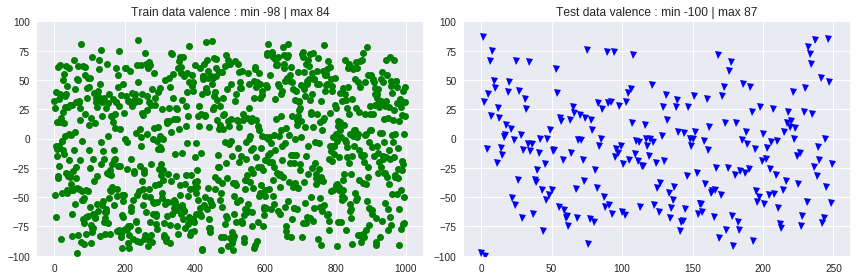

In [5]:
# Convertendo o conjunto montado acima para apenas as frases
train_frases, train_valencia, train_sent = retorna_frases(train)
test_frases, test_valencia, test_sent = retorna_frases(test)

# Definimos aqui, algumas frases sem label para avaliarmos o modelo
predict_frases = [
    'Bad news comes first, good news after',
    'I enjoy too much this movie, i love it',
    'Hate you, and your brother',
    'Great day to walk in the park and play with my dog',
    'Don\'t you worry my friend',
    'I have bad news for you sir',
    'I\'m suffering from an illness',
    'It hurts so much',
    'I dislike movies that have people walking in the park',
    'Excellent job, you are such a great employee',
    'Mohamed step into the dark mist... and discover marvelous things',
    'This smartphone sucks big time... what a shit piece of tech',
]

# Conjunto completo de frases e seus valores
datasets = np.array(train_frases + test_frases)
values = np.array(train_valencia + test_valencia)

# Criando o TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
transformed_weights = vectorizer.fit_transform(datasets)

X_train, X_test, y_train, y_test  = train_test_split(
        transformed_weights, 
        values,
        train_size=0.92, 
        random_state=1179)

# Recuperando os pesos para cada um dos itens a serem avaliados
validate_transformed_weights = vectorizer.transform(predict_frases).toarray()

print('Quanto os dados estão esparsos:')
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title(f'Train data valence : min {np.min(train_valencia)} | max {np.max(train_valencia)}')
plt.plot(np.array(range(0, len(train_valencia))), train_valencia, 'go')
plt.ylim([-100, 100])
plt.subplot(122)
plt.title(f'Test data valence : min {np.min(test_valencia)} | max {np.max(test_valencia)}')
plt.plot(np.array(range(0, len(test_valencia))), test_valencia, 'bv')
plt.ylim([-100, 100])
plt.tight_layout()
plt.show()

### Modelos de ML

#### Método de Regressão Linear (implementado)

Como teste e comparativo inicial iremos utilizar a função de Regressão Linear de Múltiplas Variáveis em comparação com a do Scikit-Learn.

Neste exemplo usaremos os dados verdadeiros que foram convertidos logo acima. 

Em seguida os mesmo serão validados por diversos outros modelos.

In [15]:
coef, y_pred = linear_regression_mul(X_train.toarray(), y_train)

md = LinearRegression(fit_intercept=False).fit(X_train.toarray(), y_train)
coef_sk, y_pred_sk = md.coef_, md.predict(X_train.toarray())

print('-' * 20)
print('Coefficients')
print('Implementation: ', coef)
print('Scikit-Learn  : ', coef_sk)

print('-' * 20)
print('Predictions')
print('Implementation: ', np.floor(y_pred[:10]))
print('Scikit-Learn  : ', np.floor(y_pred_sk[:10]))

--------------------
Coefficients
Implementation:  [-1.52935096e+14 -1.63605209e+14  3.98704977e+15 ...  5.48164201e+13
  5.48164201e+13  5.48164201e+13]
Scikit-Learn  :  [ 9.61135998e+11  1.75479928e+13 -3.92035469e+14 ...  2.45325266e+12
  2.45325266e+12  2.45325266e+12]
--------------------
Predictions
Implementation:  [-77.  79. -37.   4.   1. -52.  49.  47.  52.   9.]
Scikit-Learn  :  [-76.  86. -30.   7.  -2. -60.  50.  48.  46.   7.]


#### Modelso de ML (scikit-learn)

Para facilitar o trabalho no desenvolvimento e validação de diversos algoritmos de Machine Learning iremos continuar utilizando os modelos implementados na biblioteca scikit-learn, como Regressão Linear, Perceptron entre outros.

Modelos testados:
 - **LinearRegression**
 - **Perceptron**
 - **KNeighborsRegressor**
 - **BayesianRidge**
 - **LinearSVC**
 - **Ridge**
 
Como métrica de resultado, vamos utilizar  **Root Mean Squared Error** and **Coefficient of Determination (R2 Score)** duas métricas amplamente utilizada em Machine Learning para nos dizer se nosso modelo esta se comportando corretamente.

O melhor valor para RMSE é de 0.0, para o R2 seria em torno de 1.0 (valores menores que zero podem representar falhas no modelo).

In [16]:
models = [
    LinearRegression(n_jobs=2),
    Perceptron(max_iter=30, n_jobs=2),
    KNeighborsRegressor(),   
    BayesianRidge(),
    LinearSVC(),
    Ridge(),
]

# Vamos rodar para cada um dos modelos o fit dos dados e apresentar os resultados
for modelo in models:
    X_train_weights = X_train.copy()
    X_test_weights = X_test.copy()
    if isinstance(modelo, Perceptron) or isinstance(modelo, BayesianRidge):
        X_train_weights = X_train_weights.toarray()
        X_test_weights = X_test_weights.toarray()
    modelo.fit(X_train_weights, y_train)
    predirect_train = modelo.predict(X_train_weights)
    predirect_test = modelo.predict(X_test_weights)
    print('-' * 20)
    print(f'Model: {modelo.__class__.__name__}')
    print('Score on train data: %s' % (round(modelo.score(X_train_weights, y_train) * 100, 2)))
    print('Score on test data: %s' % (round(modelo.score(X_test_weights, y_test) * 100, 2)))
    print('MSE train:   ', round(mean_squared_error(y_train, predirect_train), 2))
    print('R2  train:   ', round(r2_score(y_train, predirect_train), 2))
    print('MSE test:   ', round(mean_squared_error(y_test, predirect_test), 2))
    print('R2  test:   ', round(r2_score(y_test, predirect_test), 2))
    print('Predicted accuracy in each phrase:')
    # Predição para as frases
    accuracies = np.floor(modelo.predict(validate_transformed_weights))
    for i, phrase in enumerate(predict_frases):
        print(f'  - {phrase} : {accuracies[i]}')

--------------------
Model: LinearRegression
Score on train data: 99.95
Score on test data: 26.62
MSE train:    1.11
R2  train:    1.0
MSE test:    1560.11
R2  test:    0.27
Predicted accuracy in each phrase:
  - Bad news comes first, good news after : 13.0
  - I enjoy too much this movie, i love it : 21.0
  - Hate you, and your brother : -8.0
  - Great day to walk in the park and play with my dog : -11.0
  - Don't you worry my friend : 1.0
  - I have bad news for you sir : -3.0
  - I'm suffering from an illness : -8.0
  - It hurts so much : -8.0
  - I dislike movies that have people walking in the park : -12.0
  - Excellent job, you are such a great employee : 29.0
  - Mohamed step into the dark mist... and discover marvelous things : -1.0
  - This smartphone sucks big time... what a shit piece of tech : 38.0
--------------------
Model: Perceptron
Score on train data: 97.91
Score on test data: 1.0
MSE train:    2.53
R2  train:    1.0
MSE test:    3740.8
R2  test:    -0.76
Predicted ac

Além da validação realizada acima, vamos verificar os dados e os modelos usando o método de **Cross Validation**.

*"... is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent dataset. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice."* https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [17]:
# Cross folding value
cv = 10

# Conjunto completo de frases e seus valores
datasets_cross = np.array(train_frases + test_frases)
values_cross = np.array(train_valencia + test_valencia)

# TF-IDF do conjunto
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
crossval_transformed_weights = vectorizer.fit_transform(datasets_cross)

# Executando para cada modelo definido
for modelo in models:
    weights = crossval_transformed_weights.copy()
    if isinstance(modelo, Perceptron) or isinstance(modelo, BayesianRidge):
        weights = crossval_transformed_weights.toarray()
    # Predição e arredondamento dos valores encontrados.
    predicted_cross = np.floor(cross_val_predict(modelo, weights, values_cross, cv=cv)).astype(np.int64)
    print('-' * 20)
    print(f'Model: {modelo.__class__.__name__}')
    print('Real values:      ', values_cross[:13])
    print('Predicted values: ', predicted_cross[:13])
    print('MSE :   ', round(mean_squared_error(values_cross, predicted_cross), 2))
    print('R2  :   ', round(r2_score(values_cross, predicted_cross), 2))

--------------------
Model: LinearRegression
Real values:       [ 32 -48  26  40  -6 -67  14  -9 -15 -32 -34  61  -6]
Predicted values:  [ -2 -35  -8  -2 -25 -30  -9 -19  10  -8 -10  -9  -9]
MSE :    1637.18
R2  :    0.28
--------------------
Model: Perceptron
Real values:       [ 32 -48  26  40  -6 -67  14  -9 -15 -32 -34  61  -6]
Predicted values:  [-27 -81 -98  73 -75 -62 -53   7  -4 -98 -10 -57 -40]
MSE :    3252.05
R2  :    -0.43
--------------------
Model: KNeighborsRegressor
Real values:       [ 32 -48  26  40  -6 -67  14  -9 -15 -32 -34  61  -6]
Predicted values:  [ 15 -61 -21  13 -29 -25 -23  -2  20   0   0 -10  -5]
MSE :    1832.89
R2  :    0.19
--------------------
Model: BayesianRidge
Real values:       [ 32 -48  26  40  -6 -67  14  -9 -15 -32 -34  61  -6]
Predicted values:  [ -2 -34  -6  -1 -24 -28  -8 -18  10  -6  -9  -7  -8]
MSE :    1633.93
R2  :    0.28
--------------------
Model: LinearSVC
Real values:       [ 32 -48  26  40  -6 -67  14  -9 -15 -32 -34  61  -6]
Predic

### Modelo de Deep Learning

Vamos avaliar também um modelo básico de Deep Learning.

Estamos utilizando a biblioteca [PyTorch ](https://pytorch.org/) (assim  como TensorFlow) outra biblioteca de Deep Learning em python.

Optamos por ela, pela maior expressividade no desenvolvimento. 

Definimos a arquitetura das camadas da Rede Neural como:

 - Linear -> ReLU
 - Linear -> ReLU
 - Linear
 - Linear -> ReLU
 - Linear

Ainda um modelo linear, porém um pouco mais além do que uma simples Regressão Linear (modelo com apenas uma camada Linear) e uma rede com duas camadas lineares e uma ReLU de ativação.

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.set_default_dtype(torch.float64)

def train_and_validate(x, y, z, predict_frases, loss_fn=None, optimizer='RMSprop', scheduler=True, epochs=200, learning_rate=1e-4): 
    # Work on gpu
    device = torch.device('cuda')
    
    # input | output dimensions
    D_in, D_out = x.shape[1], 1
    
    # Create model
    model = torch.nn.Sequential(
            torch.nn.Linear(D_in, 4096),
            torch.nn.ReLU(),
            torch.nn.Linear(4096, 2048),
            torch.nn.ReLU(),
            torch.nn.Linear(2048, 1024),
            torch.nn.Linear(1024, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, D_out),
        ).to(device)
    if not loss_fn:
        loss_fn = torch.nn.MSELoss(size_average=False)
    if optimizer == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer == 'Adadelta':
        optimizer = torch.optim.Adadelta(model.parameters())
    else:
        optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, momentum=.5)
    if scheduler:
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Loss Function: {loss_fn.__class__.__name__}')
    print(f'Optimizer: {optimizer.__class__.__name__}')
    if scheduler:
        print(f'Scheduler: {scheduler.__class__.__name__}')
    
    # Training the model
    loss_arr = np.zeros(epochs)
    for t in range(epochs):
        if scheduler:
            scheduler.step()
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(x)
        # Compute and print loss
        loss = loss_fn(y_pred, y)
        # Holding loss value to pretty print
        loss_arr[t] = loss.item()
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        predicted = model(z).data.cpu().numpy()
        
        # Print predicted values
        for i, phrase in enumerate(predict_frases):
            val = np.floor(predicted[i][0]).astype(np.int64)
            print(f'  - {phrase} : {val}')

        # Ploting the model loss
        plt.figure(figsize=(10, 4))
        plt.subplot(121)
        plt.title('Model loss')
        plt.plot(loss_arr)
        plt.subplot(122)
        plt.title('Data result')
        plt.plot(np.arange(0, 50), y[:50].cpu().numpy(), 'bv', label='from data : 50 first phrases')
        plt.ylim([-100, 100])
        plt.plot(np.array(range(0, len(predicted))), predicted, 'go', label='prediction phrases')
        plt.ylim([-100, 100])
        plt.legend()
        plt.show()

Para usar o PyTorch com melhor performance, vamos transformar os numpy arrays em torch tensors e enviá-los para serem processados na GPU do computador.

In [0]:
# Conjunto completo valores das frases
values = [[val] for val in np.array(train_valencia + test_valencia)]

# Work on gpu
device = torch.device('cuda')

# input | output | predict
x = torch.tensor(transformed_weights.toarray(), dtype=torch.float64, device=device)
y = torch.tensor(values, dtype=torch.float64, device=device)
z = torch.tensor(vectorizer.transform(predict_frases).toarray(), dtype=torch.float64, device=device)

# EPOCHS!! CHANGE TO RUN THE MODEL FIT MORE TIMES!
epochs = 75

Vamos iniciar o treinamento e avaliação de cada um dos testes de nossa simples rede neural.

Seguem os resultados, onde apresentamos a Loss Function e o Optimizer usado, assim como as valências calculadas pelo modelo.

Model: Sequential
Loss Function: MSELoss
Optimizer: RMSprop
Scheduler: StepLR
  - Bad news comes first, good news after : 35
  - I enjoy too much this movie, i love it : 31
  - Hate you, and your brother : -11
  - Great day to walk in the park and play with my dog : -13
  - Don't you worry my friend : 8
  - I have bad news for you sir : 19
  - I'm suffering from an illness : -11
  - It hurts so much : -11
  - I dislike movies that have people walking in the park : -13
  - Excellent job, you are such a great employee : 35
  - Mohamed step into the dark mist... and discover marvelous things : 6
  - This smartphone sucks big time... what a shit piece of tech : 37


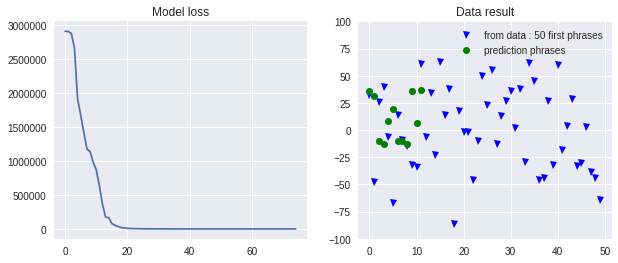

In [20]:
train_and_validate(x, y, z, predict_frases, epochs=epochs)

Model: Sequential
Loss Function: MSELoss
Optimizer: Adam
Scheduler: StepLR
  - Bad news comes first, good news after : 24
  - I enjoy too much this movie, i love it : 20
  - Hate you, and your brother : -10
  - Great day to walk in the park and play with my dog : -17
  - Don't you worry my friend : -2
  - I have bad news for you sir : 5
  - I'm suffering from an illness : -10
  - It hurts so much : -10
  - I dislike movies that have people walking in the park : -15
  - Excellent job, you are such a great employee : 26
  - Mohamed step into the dark mist... and discover marvelous things : 2
  - This smartphone sucks big time... what a shit piece of tech : 34


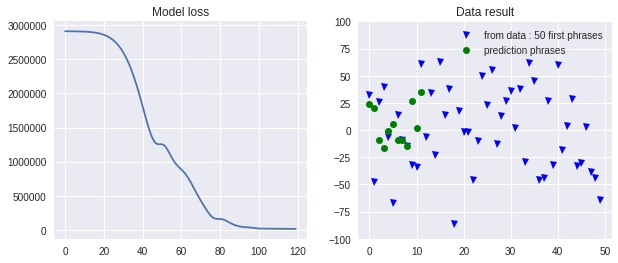

In [21]:
train_and_validate(x, y, z, predict_frases, optimizer='Adam', epochs=120)

Model: Sequential
Loss Function: MSELoss
Optimizer: Adadelta
Scheduler: StepLR
  - Bad news comes first, good news after : 9
  - I enjoy too much this movie, i love it : 13
  - Hate you, and your brother : -10
  - Great day to walk in the park and play with my dog : -10
  - Don't you worry my friend : 2
  - I have bad news for you sir : -7
  - I'm suffering from an illness : -10
  - It hurts so much : -10
  - I dislike movies that have people walking in the park : -10
  - Excellent job, you are such a great employee : 24
  - Mohamed step into the dark mist... and discover marvelous things : -1
  - This smartphone sucks big time... what a shit piece of tech : 17


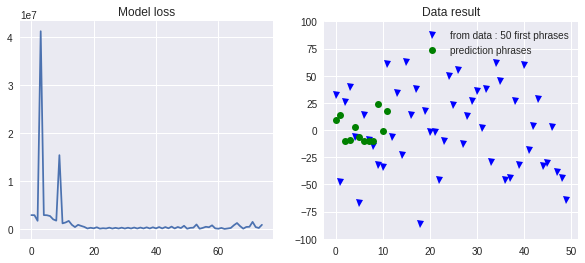

In [22]:
train_and_validate(x, y, z, predict_frases, optimizer='Adadelta', epochs=epochs)

Model: Sequential
Loss Function: L1Loss
Optimizer: RMSprop
Scheduler: StepLR
  - Bad news comes first, good news after : 25
  - I enjoy too much this movie, i love it : 17
  - Hate you, and your brother : -15
  - Great day to walk in the park and play with my dog : -15
  - Don't you worry my friend : 7
  - I have bad news for you sir : 3
  - I'm suffering from an illness : -15
  - It hurts so much : -15
  - I dislike movies that have people walking in the park : -13
  - Excellent job, you are such a great employee : 30
  - Mohamed step into the dark mist... and discover marvelous things : -7
  - This smartphone sucks big time... what a shit piece of tech : 28


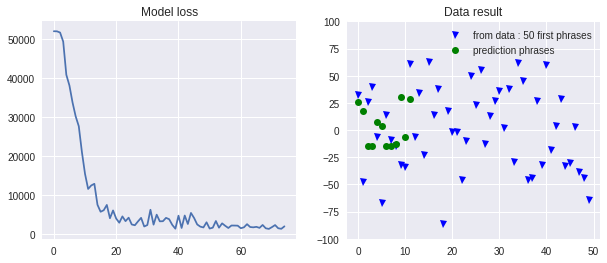

In [23]:
loss_fn = torch.nn.L1Loss(size_average=False)
train_and_validate(x, y, z, predict_frases, loss_fn=loss_fn, epochs=epochs)

## Analisando dados usando sentimentos

Em outro aspecto dos dados existentes no dataset do SemEval, é definido também valores de acordo com as emoções de cada frase.

Desse modo, iremos analisar os dados, usando os modelos acima apresentados, apontando para os sentimentos descritos.

Conforme mencionado: **anger, disgust, fear, joy, sadness, surprise**

In [0]:
def dispersion_graph(x1, x2, x1_name, x2_name, data):
    """Vamos apenas gerar um método para apresentação da dispersão dos dados."""
    x1_dispersion = np.array([m[x1] for m in data])
    x2_dispersion = np.array([m[x2] for m in data])

    plt.figure(figsize=(18, 5))
    plt.subplot(131)
    plt.title(f'{x1_name}')
    plt.plot(x1_dispersion, 'ro')
    plt.subplot(132)
    plt.title(f'{x2_name}')
    plt.plot(x2_dispersion, 'bo')
    plt.subplot(133)
    plt.title(f'{x1_name} x {x2_name}')
    plt.plot(x1_dispersion, x2_dispersion, 'go')
    plt.ylabel(f'{x1_name}')
    plt.xlabel(f'{x2_name}')
    plt.show()

In [0]:
# Conjunto completo de frases e seus valores
datasets = np.array(train_frases + test_frases)
values = np.array(train_sent + test_sent)

Apresentando a dispersão de resultados do dataset.

Como é possível notar pelos gráficos abaixo o dataset possui uma dispersão de valores. 
Quando comparamos até mesmo emoções em espectros opostos como felicidade e tristeza, percebemos que existe no dataset elementos que apresentam ambos os valores preenchidos.

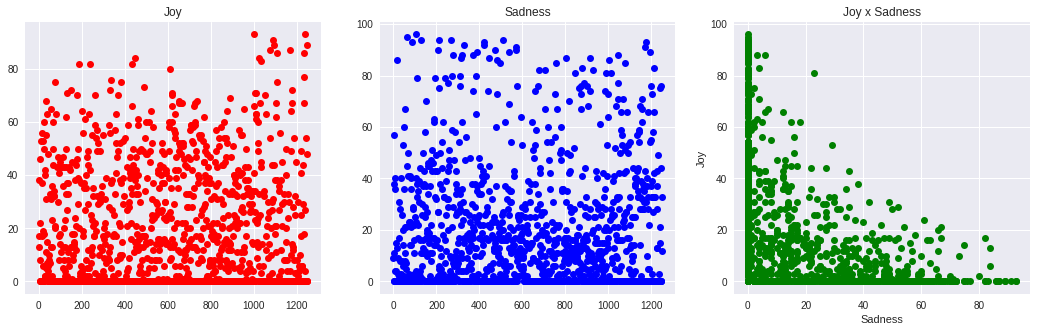

In [28]:
dispersion_graph(3, 4, 'Joy', 'Sadness', values)

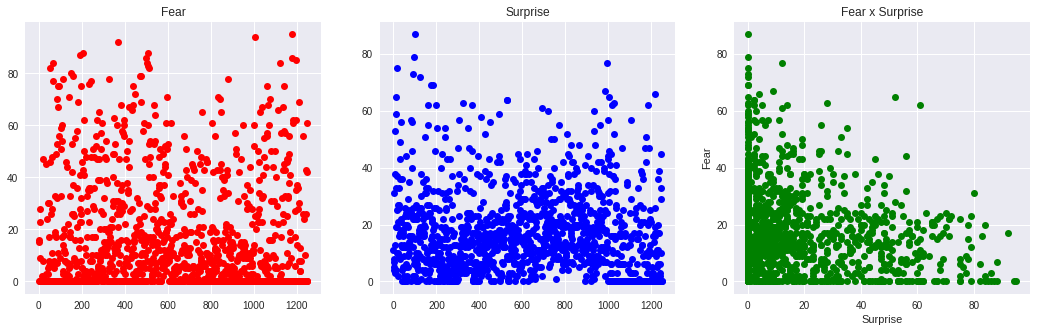

In [29]:
dispersion_graph(2, 5, 'Fear', 'Surprise', values)

Dessa maneira ao executar nossos modelos de Machine Learning nos dados, acabaremos por ter a mesma dispersão e ainda correlação entre sentimentos muitas vezes em lados opostos do espectro.

### Linear Regression

Vamos aplicar Regressão Linear nos dados dos sentimentos que estão anexados ao valores.

In [30]:
# Criando o TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
transformed_weights = vectorizer.fit_transform(datasets)

X_train, X_test, y_train, y_test  = train_test_split(
        transformed_weights, 
        values,
        train_size=0.92,
        random_state=1179)

# Recuperando os pesos para cada um dos itens a serem avaliados
validate_transformed_weights = vectorizer.transform(predict_frases).toarray()

model = LinearRegression(n_jobs=2)
model.fit(X_train, y_train)
predicted = model.predict(X_train)
print('Linear Regression: ')
print('MSE train:   ', round(mean_squared_error(y_train, predicted), 2))
print('R2  train:   ', round(r2_score(y_train, predicted), 2))

# Predição para as frases
accuracies = np.floor(model.predict(validate_transformed_weights))
for i, phrase in enumerate(predict_frases):
    print(f'  - {phrase} : ')
    for k, emot in enumerate(['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']):
        print(f'      - {emot} : {accuracies[i][k]}')

Linear Regression: 
MSE train:    0.77
R2  train:    1.0
  - Bad news comes first, good news after : 
      - anger : 4.0
      - disgust : 2.0
      - fear : 1.0
      - joy : 28.0
      - sadness : 13.0
      - surprise : 14.0
  - I enjoy too much this movie, i love it : 
      - anger : -1.0
      - disgust : 2.0
      - fear : 0.0
      - joy : 26.0
      - sadness : 11.0
      - surprise : 21.0
  - Hate you, and your brother : 
      - anger : 9.0
      - disgust : 6.0
      - fear : 16.0
      - joy : 19.0
      - sadness : 19.0
      - surprise : 17.0
  - Great day to walk in the park and play with my dog : 
      - anger : 5.0
      - disgust : 7.0
      - fear : 11.0
      - joy : 20.0
      - sadness : 24.0
      - surprise : 24.0
  - Don't you worry my friend : 
      - anger : 5.0
      - disgust : 1.0
      - fear : 11.0
      - joy : 16.0
      - sadness : 14.0
      - surprise : 20.0
  - I have bad news for you sir : 
      - anger : 7.0
      - disgust : 4.0
      - fea

### Deep Learning

Vamos também verificar esse mesmos dados de sentimentos com o modelo de Deep Learning que usamos anteriormente.

Model: Sequential
Loss Function: MSELoss
Optimizer: RMSprop
Scheduler: StepLR


No handles with labels found to put in legend.


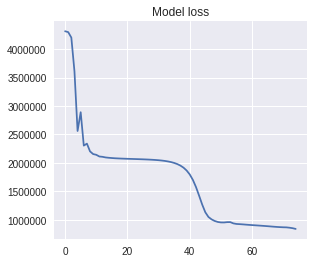

  - Bad news comes first, good news after :
      - anger : 1
      - disgust : 1
      - fear : 5
      - joy : 24
      - sadness : 8
      - surprise : 17
  - I enjoy too much this movie, i love it :
      - anger : 1
      - disgust : 1
      - fear : 4
      - joy : 18
      - sadness : 6
      - surprise : 14
  - Hate you, and your brother :
      - anger : 1
      - disgust : 1
      - fear : 4
      - joy : 7
      - sadness : 6
      - surprise : 8
  - Great day to walk in the park and play with my dog :
      - anger : 4
      - disgust : 3
      - fear : 11
      - joy : 17
      - sadness : 16
      - surprise : 20
  - Don't you worry my friend :
      - anger : 1
      - disgust : 1
      - fear : 6
      - joy : 16
      - sadness : 8
      - surprise : 14
  - I have bad news for you sir :
      - anger : 2
      - disgust : 2
      - fear : 7
      - joy : 13
      - sadness : 11
      - surprise : 13
  - I'm suffering from an illness :
      - anger : 1
      - disgust 

In [31]:
# Work on gpu
device = torch.device('cuda')

# input | output | predict
x = torch.tensor(transformed_weights.toarray(), dtype=torch.float64, device=device)
y = torch.tensor(values, dtype=torch.float64, device=device)
z = torch.tensor(vectorizer.transform(predict_frases).toarray(), dtype=torch.float64, device=device)

# input | output dimensions
D_in, D_out = x.shape[1], 6

# Create model
model = torch.nn.Sequential(
        torch.nn.Linear(D_in, 4096),
        torch.nn.ReLU(),
        torch.nn.Linear(4096, 2048),
        torch.nn.ReLU(),
        torch.nn.Linear(2048, 1024),
        torch.nn.Linear(1024, 512),
        torch.nn.ReLU(),
        torch.nn.Linear(512, D_out),
    ).to(device)

learning_rate=1e-4
loss_fn = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, momentum=.5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

print(f'Model: {model.__class__.__name__}')
print(f'Loss Function: {loss_fn.__class__.__name__}')
print(f'Optimizer: {optimizer.__class__.__name__}')
print(f'Scheduler: {scheduler.__class__.__name__}')

# Training the model
loss_arr = np.zeros(epochs)
for t in range(epochs):
    if scheduler:
        scheduler.step()
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)
    # Compute and print loss
    loss = loss_fn(y_pred, y)
    # Holding loss value to pretty print
    loss_arr[t] = loss.item()
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    predicted = model(z).data.cpu().numpy()

    # Ploting the model loss
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.title('Model loss')
    plt.plot(loss_arr)
    plt.legend()
    plt.show()

    # Print predicted values
    for i, phrase in enumerate(predict_frases):
        val = np.floor(predicted[i]).astype(np.int64)
        print(f'  - {phrase} :')
        for k, emot in enumerate(['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']):
            print(f'      - {emot} : {val[k]}')

## Aumento de dados

Acreditamos que um dos principais problemas os quais ocasionaram baixa acurácia dos modelos é a questão do tamanho do dataset.

O mesmo contém apenas 1250 linhas, desta maneira, abaixo esta uma tentativa de criar novas linhas para complementar o dataset original.

Por questão apenas de validação, iremos aumentar essa dataset original usando o movie_reviews que já existe dentro da biblioteca NLTK, e iremos apenas criar os valores de valência negativo/positivo [-100, 100].

Para determinar a valência destas frases, usaremos a [SentiWordNet](http://sentiwordnet.isti.cnr.it/).

A geração deste novo dataset não pode ser adicionado aqui neste notebook do Colaboratory por questões de uso de memória. Portanto foi criado um novo com todo o código para a geração do arquivo que estamos utilizando aqui. Esse arquivo esta no [github](https://github.com/rdenadai/ia369y/blob/master/notebooks/T2/T2_Sentiment_Analysis_Extra_dataset.ipynb).

In [6]:
!rm -rf wget-log*
!rm -rf movie_review_valence_dataset*
!wget https://raw.githubusercontent.com/rdenadai/ia369y/master/datasets/movie_review_valence_dataset.txt
!ls -lh


Redirecting output to ‘wget-log’.
total 7.8M
-rw-r--r-- 1 root root  48K Jul  2  2007 AffectiveText.Semeval.2007.tar.gz
drwxr-xr-x 2 9983 9983 4.0K Jun 20  2007 AffectiveText.test
drwxr-xr-x 2 9983 9983 4.0K Feb 25  2007 AffectiveText.trial
-rw-r--r-- 1 root root 7.8M Sep 24 16:54 movie_review_valence_dataset.txt
drwxr-xr-x 2 root root 4.0K Sep 20 00:09 sample_data
-rw-r--r-- 1 root root  738 Sep 24 16:54 wget-log


In [7]:
size = 2000
data = []
with open('movie_review_valence_dataset.txt', 'r') as fhandler:
    lines = fhandler.readlines()
    shuffle(lines)
    for line in lines[:size]:
        item = line.strip().split('|#|')
        item[-1] = float(item[-1])
        data.append(item)

dt_phrases = []
dt_values = []
for item in data:
    dt_phrases.append(item[0])
    dt_values.append(item[1])

print('Minima e Máxima valência nos dados selecionados: ')
print('Min:', np.min(dt_values))
print('Max:', np.max(dt_values))

Minima e Máxima valência nos dados selecionados: 
Min: -39.0
Max: 57.0


In [0]:
# Convertendo o conjunto montado acima para apenas as frases
train_frases, train_valencia, train_sent = retorna_frases(train)
test_frases, test_valencia, test_sent = retorna_frases(test)

# Conjunto completo de frases e seus valores
datasets = np.array(train_frases + test_frases + dt_phrases)
values = np.array(train_valencia + test_valencia + dt_values)

# Criando o TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
transformed_weights = vectorizer.fit_transform(datasets)

X = transformed_weights
Y = values

# Definimos aqui, algumas frases sem label para avaliarmos o modelo
predict_frases = [
    'Bad news comes first, good news after',
    'I enjoy too much this movie, i love it',
    'Hate you, and your brother',
    'Great day to walk in the park and play with my dog',
    'Don\'t you worry my friend',
    'I have bad news for you sir',
    'I\'m suffering from an illness',
    'It hurts so much',
    'I dislike movies that have people walking in the park',
    'Excellent job, you are such a great employee',
    'Mohamed step into the dark mist... and discover marvelous things',
    'This smartphone sucks big time... what a shit piece of tech',
]

# Recuperando os pesos para cada um dos itens a serem avaliados
validate_transformed_weights = vectorizer.transform(predict_frases).toarray()

#### Distribuição dos dados do novo dataset criado.

Infelizmente, pelos dados abaixo, podemos notar que nosso novo dataset possui dispersão bem inferior ao dataset original oferecido pela SemEval.

Sem saber exatamente como o dataset original foi calculado, acabamos encontrando um problema.

De qualquer maneira, para confirmar que teremos resultados piores, iremos seguir em frente e adicionar estes novos dados, juntamente com os do SemEval para mostrar a predição dos modelos.

Quanto os dados estão esparsos:


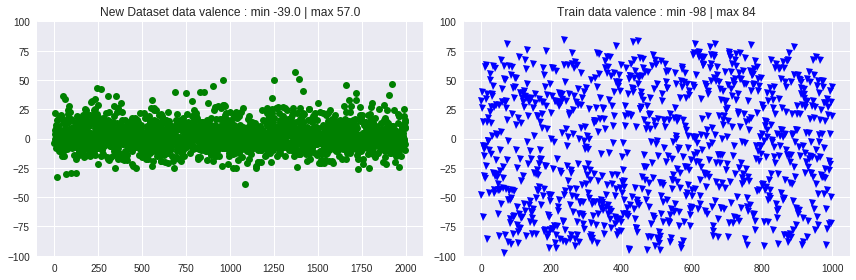

In [9]:
print('Quanto os dados estão esparsos:')
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title(f'New Dataset data valence : min {np.min(dt_values)} | max {np.max(dt_values)}')
plt.plot(np.array(range(0, len(dt_values))), dt_values, 'go')
plt.ylim([-100, 100])
plt.subplot(122)
plt.title(f'Train data valence : min {np.min(train_valencia)} | max {np.max(train_valencia)}')
plt.plot(np.array(range(0, len(train_valencia))), train_valencia, 'bv')
plt.ylim([-100, 100])
plt.tight_layout()
plt.show()

#### Linear Regression

In [10]:
print('Starting the Model...')
md = LinearRegression(n_jobs=2).fit(X, Y)

Starting the Model...


In [11]:
k, l = X[:250], Y[:250]
predirect_train = md.predict(k)
print('-' * 20)
print(f'Model: {md.__class__.__name__}')
print('Score on train data: %s' % (round(md.score(k, l) * 100, 2)))
print('MSE train:   ', round(mean_squared_error(l, predirect_train), 2))
print('R2  train:   ', round(r2_score(l, predirect_train), 2))
print('Predicted accuracy in each phrase:')
# Predição para as frases
accuracies = np.floor(md.predict(validate_transformed_weights))
for i, phrase in enumerate(predict_frases):
    print(f'  - {phrase} : {accuracies[i]}')

--------------------
Model: LinearRegression
Score on train data: 99.96
MSE train:    0.88
R2  train:    1.0
Predicted accuracy in each phrase:
  - Bad news comes first, good news after : 24.0
  - I enjoy too much this movie, i love it : 6.0
  - Hate you, and your brother : -1.0
  - Great day to walk in the park and play with my dog : -13.0
  - Don't you worry my friend : 6.0
  - I have bad news for you sir : 4.0
  - I'm suffering from an illness : 5.0
  - It hurts so much : -2.0
  - I dislike movies that have people walking in the park : 5.0
  - Excellent job, you are such a great employee : 7.0
  - Mohamed step into the dark mist... and discover marvelous things : 2.0
  - This smartphone sucks big time... what a shit piece of tech : 17.0


#### Deep Learning

In [0]:
# Conjunto completo valores das frases
values = [[val] for val in Y]

# Work on gpu
device = torch.device('cuda')

# input | output | predict
x = torch.tensor(X.toarray(), dtype=torch.float64, device=device)
y = torch.tensor(values, dtype=torch.float64, device=device)
z = torch.tensor(validate_transformed_weights, dtype=torch.float64, device=device)

# EPOCHS!! CHANGE TO RUN THE MODEL FIT MORE TIMES!
epochs = 75

Model: Sequential
Loss Function: MSELoss
Optimizer: RMSprop
Scheduler: StepLR
  - Bad news comes first, good news after : 31
  - I enjoy too much this movie, i love it : 12
  - Hate you, and your brother : 1
  - Great day to walk in the park and play with my dog : -16
  - Don't you worry my friend : 10
  - I have bad news for you sir : 18
  - I'm suffering from an illness : 10
  - It hurts so much : -4
  - I dislike movies that have people walking in the park : 5
  - Excellent job, you are such a great employee : 10
  - Mohamed step into the dark mist... and discover marvelous things : 9
  - This smartphone sucks big time... what a shit piece of tech : 21


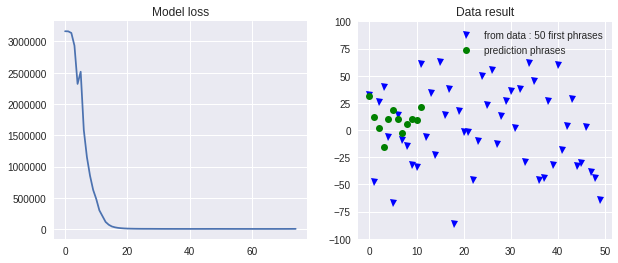

In [15]:
train_and_validate(x, y, z, predict_frases, epochs=epochs)

## Considerações Finais

Por se tratar de dois problemas extremamente complexos, sendo o primeiro dele a classificação e análise textual, e em seguida o reconhecimento de emoções. Os resultados apresentados pelos modelos podem ser levados em consideração para estudos mais profundos os quais podemos obter melhorias.

Um fator que parece ser muito relevante é a quantidade de dados existente no dataset e sua dispersão. Como o dataset original é muito pequeno, por vezes algumas frases não são identificadas corretamente ou tem um pequeno desvio considerado inválido.

Com os novos dados criados por nós (utilizando um algoritmo para gerar a valência das frases), é possível notar que a grande dispersão dos dados pode vir a influenciar os valores finais das próximas frases que forem preditas.

Importante notar que todo o procedimento de geração das valências das novas frases foi totalmente automático, quando na verdade, o ideal seria validar se esses valores de valência estão corretos (pode-se observar o dataset e perceber que alguns valores de valência estão incorretos).

Consideramos que o uso das ferramentas de Machine Learning podem contruibuir para o reconhecimento de emoções em textos, entretanto ainda existem um amplo campo a se explorar nesta área.

## Lições aprendidas

1. Saber como foi gerado o dataset original criado, especialmente se for o caso para ampliar a quantidade de itens.
2. Aplicar e testar outros métodos estatísticos nos textos, como por exemplo [Word Embedding](https://en.wikipedia.org/wiki/Word_embedding) (implementado como: [Word2Vec](https://en.wikipedia.org/wiki/Word2vec))
3. Pesquisar, avaliar e testar outras arquiteturas de Redes Neurais ([RNN](https://en.wikipedia.org/wiki/Recursive_neural_network) por exemplo, conforme tutorial [Classifying Names with a Character-Level RNN](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html))
4. Entender e implementar melhores métodos para se classificar novos itens dentro do dataset (manualmente avaliar o resultado dos modelos e definir se esta correto ou não antes de adicionar como novo elemento no dataset).
5. Compreender melhor a formação da linguagem escrita, e principalmente a correção das palavras dentro do texto. Estudo este que está além de puramente o exercício da área de Computação.